In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\freji\Downloads\train (1).csv')
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encode = LabelEncoder()

In [7]:
df['Sex'] = encode.fit_transform(df['Sex'])

In [8]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
dft = df.copy()

In [13]:
bin_age = [0,10,20,30,40,50,60,70,80]
df['Age'] = pd.cut(df['Age'],bins=bin_age)
df['Age']

0      (20, 30]
1      (30, 40]
2      (20, 30]
3      (30, 40]
4      (30, 40]
         ...   
886    (20, 30]
887    (10, 20]
888    (20, 30]
889    (20, 30]
890    (30, 40]
Name: Age, Length: 891, dtype: category
Categories (8, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

# Visualisation

In [14]:
from matplotlib import pyplot as plt

In [15]:
def  barchart1(column):
    SURVIVED = df[df['Survived']==1][column].value_counts()
    DEAD = df[df['Survived']==0][column].value_counts()
    bc = pd.DataFrame([SURVIVED,DEAD])
    bc.index = ['Survived','Dead']
    
    ax=bc.plot(kind = 'barh', stacked = False, figsize = (10,5))
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    
    ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

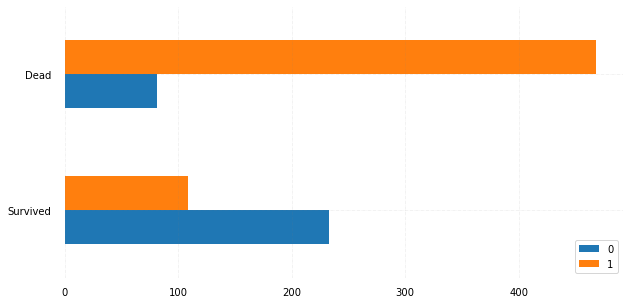

In [16]:
barchart1('Sex')

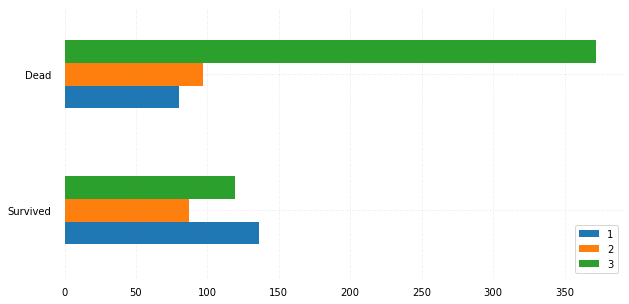

In [17]:
barchart1('Pclass')

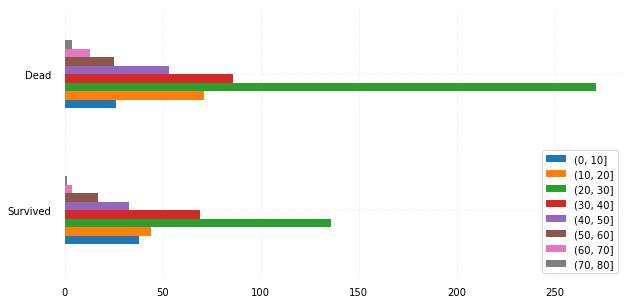

In [18]:
barchart1('Age')

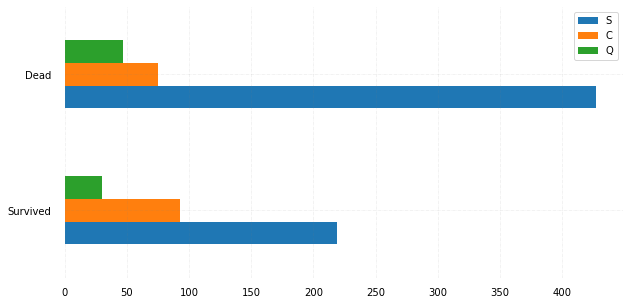

In [19]:
barchart1('Embarked')

In [20]:
df[["Sex","Survived"]].groupby(["Survived","Sex"], as_index=True).size()

Survived  Sex
0         0       81
          1      468
1         0      233
          1      109
dtype: int64

In [21]:
ndf = df[df["Survived"]==1]
ndf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,"(30, 40]",1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,"(20, 30]",0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,"(30, 40]",1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,"(20, 30]",0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,"(10, 20]",1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",0,"(10, 20]",0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,"(50, 60]",0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,"(20, 30]",0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,"(10, 20]",0,0,112053,30.0000,B42,S


The dataframe above shows the datas of those people who has survived the accident.

In [22]:
def  barchart2(column):
    Female= ndf[ndf['Sex']=='female'][column].value_counts()
    Male = ndf[ndf['Sex']=='male'][column].value_counts()
    bc = pd.DataFrame([Female,Male])
    bc.index = ['Female','Male']
    
    ax=bc.plot(kind = 'barh', stacked = False, figsize = (10,5))
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    
    ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

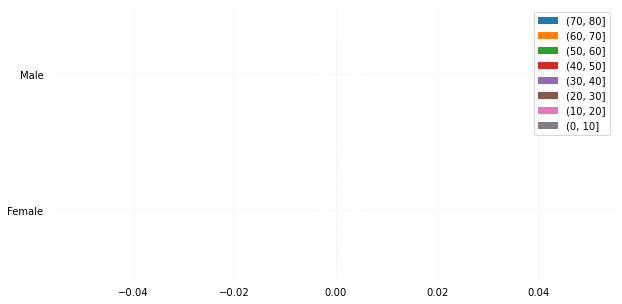

In [23]:
barchart2('Age')

In [24]:
barchart2('Pclass')

TypeError: no numeric data to plot

In [ ]:
barchart2('Embarked')

In [ ]:
ndf1 = pd.DataFrame(ndf[["Sex","Pclass","Embarked","Age"]].groupby(["Sex","Embarked","Pclass","Age"], as_index=True).size())
ndf1.style

The above table shows the no. of people who survived corresponding to what gender they were, towards where they were heading, which class did they belong to and under what age group were they.

# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
dft

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encode = LabelEncoder()

In [ ]:
dft['Sex'] = encode.fit_transform(dft['Sex'])

In [ ]:
dft

In [ ]:
dft_emb = pd.get_dummies(dft['Embarked'],drop_first=False)

In [ ]:
dft = pd.concat([dft,dft_emb,],axis=1)
dft

In [ ]:
dft.drop(dft[['PassengerId','Name','Ticket','Embarked','Cabin']],axis=1,inplace=True)

In [ ]:
dft

In [ ]:
x = dft.drop('Survived', axis=1)
y = dft['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [ ]:
from sklearn.metrics import *

In [ ]:
log_reg = LogisticRegression(solver='liblinear')
lgr_fit = log_reg.fit(X_train,y_train)
lgr_pred = lgr_fit.predict(X_test)
log_reg_scr = round(accuracy_score(y_test,lgr_pred),2)*100
print('Accuracy =',log_reg_scr,'%')

In [ ]:
knn_model = KNeighborsClassifier()
knn_fit = knn_model.fit(X_train,y_train)
knn_pred = knn_fit.predict(X_test)
knn_scr = round(accuracy_score(y_test,knn_pred),2)*100
print('Accuracy =',knn_scr,'%')

In [ ]:
dtc = DecisionTreeClassifier()
dtc_fit = dtc.fit(X_train,y_train)
dtc_pred = dtc_fit.predict(X_test)
dtc_scr = round(accuracy_score(y_test,dtc_pred),2)*100
print('Accuracy =',dtc_scr,'%')

In [ ]:
nb = MultinomialNB()
nb_fit = nb.fit(X_train,y_train)
nb_pred = nb_fit.predict(X_test)
nb_scr = round(accuracy_score(y_test,nb_pred),2)*100
print('Accuracy =',nb_scr,'%')

In [ ]:
clf = RandomForestClassifier()
clf_fit = clf.fit(X_train,y_train)
clf_pred = clf_fit.predict(X_test)
clf_scr = round(accuracy_score(y_test,clf_pred),2)*100
print('Accuracy =',clf_scr,'%')

In [ ]:
model_score = pd.DataFrame({'Model': ['Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest'],
                           'Score': [log_reg_scr,knn_scr,dtc_scr,nb_scr,clf_scr]})
model_score

From the above table we can conclude that highest accuracy was obtained using Random Forest Classifier.